In [72]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import regex
from nltk import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import seaborn as sns

In [2]:
df=pd.read_csv('./data.csv')
df.shape

(199706, 4)

In [3]:
df.head()

,Headline,Content,News Categories,Date
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023


In [4]:

threshold = 5

# Identify classes with fewer instances
class_counts = df['News Categories'].value_counts()
rare_classes = class_counts[class_counts < threshold].index

# Group rare classes into a broader category 'Other'
df['category_grouped'] = df['News Categories'].apply(lambda x: 'Other' if x in rare_classes else x)

In [5]:
df["News Categories"]

0                            ['national']
1                            ['national']
2                            ['national']
3                            ['national']
4                            ['national']
                       ...               
199701    ['science', 'Health___Fitness']
199702    ['science', 'Health___Fitness']
199703               ['Health___Fitness']
199704    ['science', 'Health___Fitness']
199705               ['Health___Fitness']
Name: News Categories, Length: 199706, dtype: object

In [6]:
df['category_grouped']

0                            ['national']
1                            ['national']
2                            ['national']
3                            ['national']
4                            ['national']
                       ...               
199701    ['science', 'Health___Fitness']
199702    ['science', 'Health___Fitness']
199703               ['Health___Fitness']
199704    ['science', 'Health___Fitness']
199705               ['Health___Fitness']
Name: category_grouped, Length: 199706, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199706 entries, 0 to 199705
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Headline          199706 non-null  object
 1   Content           199706 non-null  object
 2   News Categories   199706 non-null  object
 3   Date              199706 non-null  object
 4   category_grouped  199706 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


In [8]:
df.isnull().sum()

Headline            0
Content             0
News Categories     0
Date                0
category_grouped    0
dtype: int64

In [9]:
df.duplicated().sum()

35452

In [10]:
df["Date"].head()

0    19-09-2023
1    19-09-2023
2    19-09-2023
3    19-09-2023
4    19-09-2023
Name: Date, dtype: object

In [11]:
df["News Categories"].unique().sum()

"['national']['entertainment', 'national']['politics', 'national']['world', 'national']['national', 'technology']['business', 'national']['sports', 'national']['world', 'national', 'Health___Fitness']['national', 'Health___Fitness']['business', 'technology']['business']['business', 'startup']['automobile', 'business', 'technology']['business', 'fashion']['world', 'business']['world', 'business', 'technology']['automobile', 'business']['business', 'entertainment', 'national']['world', 'business', 'national']['business', 'science', 'technology']['cryptocurrency', 'business', 'technology']['automobile', 'business', 'national']['politics']['politics', 'sports', 'Asia_Cup_2023']['politics', 'entertainment']['sports']['sports', 'entertainment']['sports', 'Asia_Cup_2023']['Asia_Cup_2023', 'sports']['sports', 'Asia_Cup_2023', 'entertainment']['technology']['world', 'technology']['cryptocurrency', 'technology']['science', 'technology']['entertainment', 'technology']['sports', 'technology']['aut

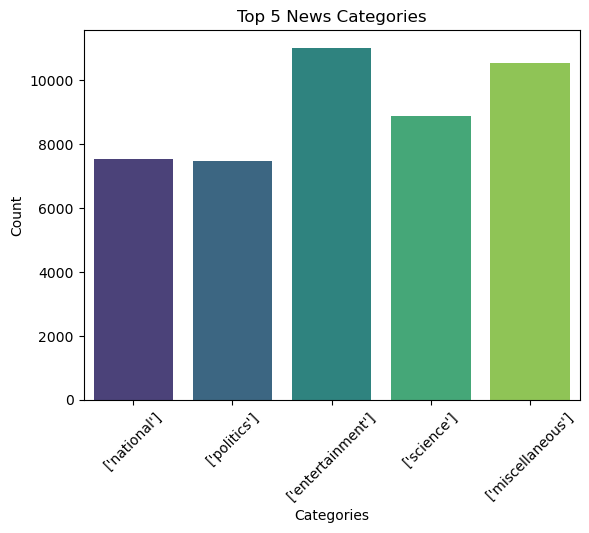

In [12]:
top_n = 5
top_categories = df['News Categories'].value_counts().nlargest(top_n).index

df_top = df[df['News Categories'].isin(top_categories)]

sns.countplot(x='News Categories', data=df_top, palette='viridis')
plt.title(f'Top {top_n} News Categories')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show();

In [13]:
import string
string.punctuation
punc=string.punctuation

In [14]:
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

df["News Categories"]=df["News Categories"].apply(remove_punc)
df.head()

,Headline,Content,News Categories,Date,category_grouped
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,national,19-09-2023,['national']
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,national,19-09-2023,['national']
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,national,19-09-2023,['national']
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",national,19-09-2023,['national']
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,national,19-09-2023,['national']


In [15]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed',dayfirst=True)

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df.head()

,Headline,Content,News Categories,Date,category_grouped,year,month,day
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,national,2023-09-19,['national'],2023,9,19
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,national,2023-09-19,['national'],2023,9,19
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,national,2023-09-19,['national'],2023,9,19
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",national,2023-09-19,['national'],2023,9,19
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,national,2023-09-19,['national'],2023,9,19


In [16]:
df=df.drop('Date',axis=1)

In [17]:
df.head()

,Headline,Content,News Categories,category_grouped,year,month,day
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,national,['national'],2023,9,19
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,national,['national'],2023,9,19
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,national,['national'],2023,9,19
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",national,['national'],2023,9,19
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,national,['national'],2023,9,19


In [18]:
df["Content"]=df["Content"].str.lower()
df.head()

,Headline,Content,News Categories,category_grouped,year,month,day
0,Congress leader Baljinder Singh shot dead at h...,congress leader baljinder singh was shot dead ...,national,['national'],2023,9,19
1,17-year-old girl preparing for NEET dies by su...,another neet aspirant died by suicide in rajas...,national,['national'],2023,9,19
2,Hampers to welcome MPs in new Parliament tomor...,in order to mark the first-ever working day of...,national,['national'],2023,9,19
3,"Only 10% women lawmakers in RS, while only 14%...","congress president mallikarjun kharge, while s...",national,['national'],2023,9,19
4,"Ganesh temple decorated with notes, coins wort...",the sri sathya ganapathi temple in bengaluru a...,national,['national'],2023,9,19


In [19]:
# !pip install beautifulsoup4

In [20]:
def has_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return bool(soup.find())

df['has_html_tags'] = df['Content'].apply(has_html_tags)

In [21]:
count_true = df['has_html_tags'].sum()
count_true

0

In [22]:
df = df.drop('has_html_tags', axis=1)
df

,Headline,Content,News Categories,category_grouped,year,month,day
0,Congress leader Baljinder Singh shot dead at h...,congress leader baljinder singh was shot dead ...,national,['national'],2023,9,19
1,17-year-old girl preparing for NEET dies by su...,another neet aspirant died by suicide in rajas...,national,['national'],2023,9,19
2,Hampers to welcome MPs in new Parliament tomor...,in order to mark the first-ever working day of...,national,['national'],2023,9,19
3,"Only 10% women lawmakers in RS, while only 14%...","congress president mallikarjun kharge, while s...",national,['national'],2023,9,19
4,"Ganesh temple decorated with notes, coins wort...",the sri sathya ganapathi temple in bengaluru a...,national,['national'],2023,9,19
...,...,...,...,...,...,...,...
199701,Cause for age related diabetes can be pancreat...,"the pancreas is an incredibly important organ,...",science HealthFitness,"['science', 'Health___Fitness']",2024,1,20
199702,Study unveils Why sugary drinks may be bad for...,a recent study published in oral diseases has...,science HealthFitness,"['science', 'Health___Fitness']",2024,1,20
199703,Why do Hospital-acquired infections happen? Ex...,hospital-acquired infections (hais) refer to i...,HealthFitness,['Health___Fitness'],2024,1,20
199704,Oxford launches first human vaccine trials for...,scientists at the university of oxford in the ...,science HealthFitness,"['science', 'Health___Fitness']",2024,1,20


In [23]:
# !pip install emoji
# !pip install --upgrade emoji
# !pip install regex

In [24]:

def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['Content'].apply(has_emoji)

has_emojis

0         False
1          True
2         False
3          True
4          True
          ...  
199701    False
199702    False
199703    False
199704     True
199705    False
Name: Content, Length: 199706, dtype: bool

In [25]:
has_emojis.sum()

127178

In [26]:
def remove_emojis(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return emoji_pattern.sub('', text)

df['Content'] = df['Content'].apply(remove_emojis)

In [27]:
has_emojis =  df['Content'].apply(has_emoji)
has_emojis

0         False
1         False
2         False
3         False
4         False
          ...  
199701    False
199702    False
199703    False
199704    False
199705    False
Name: Content, Length: 199706, dtype: bool

In [28]:
has_emojis.sum()

0

In [29]:
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["Content"]=df["Content"].apply(remove_url)

In [30]:
import string
string.punctuation

punc=string.punctuation

In [31]:
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))
df["Content"]=df["Content"].apply(remove_punc)

In [32]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashagarwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words=set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df["Content"]=df["Content"].apply(lambda x: remove_stopwords(x))

In [34]:
import nltk
nltk.download('punkt')

abbreviation_dict = {
    'LOL': 'laugh out loud',
    'BRB': 'be right back',
    'OMG': 'oh my god',
    'AFAIK': 'as far as I know',
    'AFK': 'away from keyboard',
    'ASAP': 'as soon as possible',
    'ATK': 'at the keyboard',
    'ATM': 'at the moment',
    'A3': 'anytime, anywhere, anyplace',
    'BAK': 'back at keyboard',
    'BBL': 'be back later',
    'BBS': 'be back soon',
    'BFN': 'bye for now',
    'B4N': 'bye for now',
    'BRB': 'be right back',
    'BRT': 'be right there',
    'BTW': 'by the way',
    'B4': 'before',
    'B4N': 'bye for now',
    'CU': 'see you',
    'CUL8R': 'see you later',
    'CYA': 'see you',
    'FAQ': 'frequently asked questions',
    'FC': 'fingers crossed',
    'FWIW': 'for what it\'s worth',
    'FYI': 'For Your Information',
    'GAL': 'get a life',
    'GG': 'good game',
    'GN': 'good night',
    'GMTA': 'great minds think alike',
    'GR8': 'great!',
    'G9': 'genius',
    'IC': 'i see',
    'ICQ': 'i seek you',
    'ILU': 'i love you',
    'IMHO': 'in my honest/humble opinion',
    'IMO': 'in my opinion',
    'IOW': 'in other words',
    'IRL': 'in real life',
    'KISS': 'keep it simple, stupid',
    'LDR': 'long distance relationship',
    'LMAO': 'laugh my a.. off',
    'LOL': 'laughing out loud',
    'LTNS': 'long time no see',
    'L8R': 'later',
    'MTE': 'my thoughts exactly',
    'M8': 'mate',
    'NRN': 'no reply necessary',
    'OIC': 'oh i see',
    'PITA': 'pain in the a..',
    'PRT': 'party',
    'PRW': 'parents are watching',
    'QPSA?': 'que pasa?',
    'ROFL': 'rolling on the floor laughing',
    'ROFLOL': 'rolling on the floor laughing out loud',
    'ROTFLMAO': 'rolling on the floor laughing my a.. off',
    'SK8': 'skate',
    'STATS': 'your sex and age',
    'ASL': 'age, sex, location',
    'THX': 'thank you',
    'TTFN': 'ta-ta for now!',
    'TTYL': 'talk to you later',
    'U': 'you',
    'U2': 'you too',
    'U4E': 'yours for ever',
    'WB': 'welcome back',
    'WTF': 'what the f...',
    'WTG': 'way to go!',
    'WUF': 'where are you from?',
    'W8': 'wait...',
    '7K': 'sick laughter',
    'TFW': 'that feeling when',
    'MFW': 'my face when',
    'MRW': 'my reaction when',
    'IFYP': 'i feel your pain',
    'LOL': 'laughing out loud',
    'TNTL': 'trying not to laugh',
    'JK': 'just kidding',
    'IDC': 'i don’t care',
    'ILY': 'i love you',
    'IMU': 'i miss you',
    'ADIH': 'another day in hell',
    'IDC': 'i don’t care',
    'ZZZ': 'sleeping, bored, tired',
    'WYWH': 'wish you were here',
    'TIME': 'tears in my eyes',
    'BAE': 'before anyone else',
    'FIMH': 'forever in my heart',
    'BSAAW': 'big smile and a wink',
    'BWL': 'bursting with laughter',
    'LMAO': 'laughing my a** off',
    'BFF': 'best friends forever',
    'CSL': 'can’t stop laughing',
}

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yashagarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
def replace_abbreviations(text, abbreviation_dict):
    for abbreviation, full_form in abbreviation_dict.items():
        text = text.replace(abbreviation, full_form)
    return text
df['Content'] = df['Content'].apply(lambda x: replace_abbreviations(x,abbreviation_dict))

In [36]:
df.head()

,Headline,Content,News Categories,category_grouped,year,month,day
0,Congress leader Baljinder Singh shot dead at h...,congress leader baljinder singh shot dead hous...,national,['national'],2023,9,19
1,17-year-old girl preparing for NEET dies by su...,another neet aspirant died suicide rajasthans ...,national,['national'],2023,9,19
2,Hampers to welcome MPs in new Parliament tomor...,order mark firstever working day new parliamen...,national,['national'],2023,9,19
3,"Only 10% women lawmakers in RS, while only 14%...",congress president mallikarjun kharge speaking...,national,['national'],2023,9,19
4,"Ganesh temple decorated with notes, coins wort...",sri sathya ganapathi temple bengaluru adorned ...,national,['national'],2023,9,19


In [37]:
import nltk
nltk.download('punkt')

def tokenize_text(text):
    # Tokenize each sentence into words
    words_list = [word_tokenize(sentence) for sentence in sent_tokenize(text)]

    words = ' '.join(' '.join(words) for words in words_list)

    return words

df["Content"] = df["Content"].apply(tokenize_text)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yashagarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Headline,Content,News Categories,category_grouped,year,month,day
0,Congress leader Baljinder Singh shot dead at h...,congress leader baljinder singh shot dead hous...,national,['national'],2023,9,19
1,17-year-old girl preparing for NEET dies by su...,another neet aspirant died suicide rajasthans ...,national,['national'],2023,9,19
2,Hampers to welcome MPs in new Parliament tomor...,order mark firstever working day new parliamen...,national,['national'],2023,9,19
3,"Only 10% women lawmakers in RS, while only 14%...",congress president mallikarjun kharge speaking...,national,['national'],2023,9,19
4,"Ganesh temple decorated with notes, coins wort...",sri sathya ganapathi temple bengaluru adorned ...,national,['national'],2023,9,19


In [38]:
!pip install imbalanced-learn

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

In [40]:
X = df['Content']
y = df['category_grouped']

# Encoding labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_weights_train = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)

X

0         congress leader baljinder singh shot dead hous...
1         another neet aspirant died suicide rajasthans ...
2         order mark firstever working day new parliamen...
3         congress president mallikarjun kharge speaking...
4         sri sathya ganapathi temple bengaluru adorned ...
                                ...                        
199701    pancreas incredibly important organ particular...
199702    recent study published oral diseases reported ...
199703    hospitalacquired infections hais refer infecti...
199704    scientists university oxford uk launched first...
199705    high blood pressure happens force blood pushin...
Name: Content, Length: 199706, dtype: object

In [41]:
y.shape

(199706,)

In [42]:
y_encoded

array([284, 284, 284, ...,  72, 346,  72])

In [43]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [44]:
# Multinomial Naive Bayes with Bag of Words


model = make_pipeline(CountVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"MultinomialNB with Bag of Words accuracy: {accuracy:.3f}")
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

MultinomialNB with Bag of Words accuracy: 0.892
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00         8
           2       1.00      1.00      1.00        11
           3       1.00      0.83      0.91        30
           4       1.00      1.00      1.00         9
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00        18
           9       1.00      0.71      0.83         7
          10       0.00      0.00      0.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        15
          13       0.00      0.00      0.00         7
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         6
         

/Users/yashagarwal/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashagarwal/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashagarwal/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [65]:

cv_scores = cross_val_score(model, X, y_encoded, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring='accuracy')

print(f"Cross-Validation Scores:{cv_scores}")

print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores:[0.87537743 0.87295888 0.87152986]
Mean Accuracy: 0.87


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'countvectorizer__max_features': [5000, 10000, None],
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'multinomialnb__alpha': uniform(0.1, 2.0)  # Example range for alpha
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=cv, verbose=1, n_jobs=1)
random_search.fit(X, y_encoded)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer(max_features=10000)),
                                             ('multinomialnb',
                                              MultinomialNB(alpha=1.0391480194088836))]),
                   n_iter=5, n_jobs=1,
                   param_distributions={'countvectorizer__max_features': [5000,
                                                                          10000,
                                                                          None],
                                        'countvectorizer__ngram_range': [(1, 1),
                                                                         (1,
                                                                          2)],
                                        'multinomialnb__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x149f59650>},
                   scoring='accuracy', verbose=1)

In [67]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'countvectorizer__max_features': None, 'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 1.4971667929176662}


In [80]:
y_pred_random = random_search.predict(X_test)

In [68]:
best_model = random_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy:.3f}")

Best Model Accuracy: 0.942


In [69]:
# Inverse transform the predicted labels to get the original class labels
predicted_labels_original = le.inverse_transform(y_pred_best)

In [70]:
correct_predictions = sum(y_test == y_pred_best)
wrong_predictions = len(y_test) - correct_predictions
print(f'Correct Predictions: {correct_predictions}, Wrong Predictions: {wrong_predictions}')

Correct Predictions: 37643, Wrong Predictions: 2299


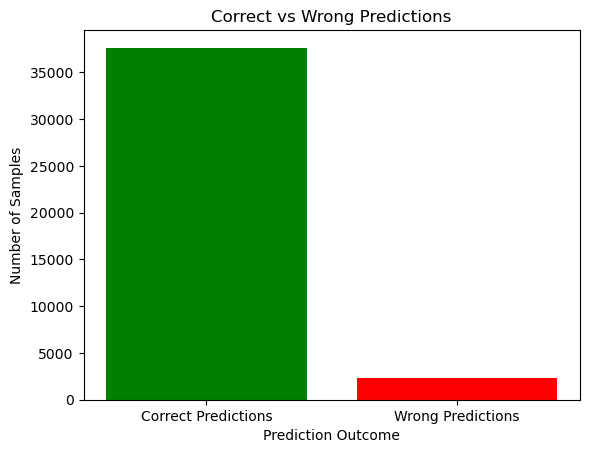

In [71]:
labels = ['Correct Predictions', 'Wrong Predictions']
values = [correct_predictions, wrong_predictions]

plt.bar(labels, values, color=['green', 'red'])
plt.title('Correct vs Wrong Predictions')
plt.xlabel('Prediction Outcome')
plt.ylabel('Number of Samples')
plt.show()

In [78]:
print("MULTINOMIAL NAIVE BAYES MODEL\n\n")

mnb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {mnb_accuracy:.2f}\n")

# Precision
mnb_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Precision: {mnb_precision:.2f}\n")

# Recall
mnb_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Recall: {mnb_recall:.2f}\n")

# F1-Score
mnb_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"F1-Score: {mnb_f1:.2f}\n")

# # Log Loss
# mnb_logloss = log_loss(y_test, model.predict_proba(X_test), labels=np.unique(y_test))
# print(f"Log Loss: {mnb_logloss:.2f}\n")


MULTINOMIAL NAIVE BAYES MODEL


Accuracy: 0.89

Precision: 0.90

Recall: 0.89

F1-Score: 0.88



In [81]:
print("RANDOMIZED SEARCH MODEL\n\n")

rnd_accuracy = accuracy_score(y_test, y_pred_random)
print(f"Accuracy: {rnd_accuracy:.2f}\n")

# Precision
rnd_precision = precision_score(y_test, y_pred_random, average='weighted', zero_division=1)
print(f"Precision: {rnd_precision:.2f}\n")

# Recall
rnd_recall = recall_score(y_test, y_pred_random, average='weighted', zero_division=1)
print(f"Recall: {rnd_recall:.2f}\n")

# F1-Score
rnd_f1 = f1_score(y_test, y_pred_random, average='weighted', zero_division=1)
print(f"F1-Score: {rnd_f1:.2f}\n")

# # Log Loss
# mnb_logloss = log_loss(y_test, model.predict_proba(X_test), labels=np.unique(y_test))
# print(f"Log Loss: {mnb_logloss:.2f}\n")


RANDOMIZED SEARCH MODEL


Accuracy: 0.94

Precision: 0.95

Recall: 0.94

F1-Score: 0.93



In [82]:
print("BEST MODEL\n\n")

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {best_accuracy:.2f}\n")

# Precision
best_precision = precision_score(y_test, y_pred_best, average='weighted', zero_division=1)
print(f"Precision: {best_precision:.2f}\n")

# Recall
best_recall = recall_score(y_test, y_pred_best, average='weighted', zero_division=1)
print(f"Recall: {best_recall:.2f}\n")

# F1-Score
best_f1 = f1_score(y_test, y_pred_best, average='weighted', zero_division=1)
print(f"F1-Score: {best_f1:.2f}\n")

# # Log Loss
# mnb_logloss = log_loss(y_test, model.predict_proba(X_test), labels=np.unique(y_test))
# print(f"Log Loss: {mnb_logloss:.2f}\n")


BEST MODEL


Accuracy: 0.94

Precision: 0.95

Recall: 0.94

F1-Score: 0.93



In [83]:
metrics = []

metrics.append({
    'Model': 'MultiNomial Naive Bayes',
    'Accuracy': round(mnb_accuracy * 100, 2),
    'Precision': round(mnb_precision, 2),
    'Recall': round(mnb_recall, 2),
    'F1-Score': round(mnb_f1, 2),
})

metrics.append({
    'Model': 'Randomized Search',
    'Accuracy': round(rnd_accuracy * 100, 2),
    'Precision': round(rnd_precision, 2),
    'Recall': round(rnd_recall, 2),
    'F1-Score': round(rnd_f1, 2),
})

metrics.append({
    'Model': 'Randomized Search (Best Estimator)',
    'Accuracy': round(best_accuracy * 100, 2),
    'Precision': round(best_precision, 2),
    'Recall': round(best_recall, 2),
    'F1-Score': round(best_f1, 2),
})

metricsDF = pd.DataFrame(metrics)


In [84]:
metricsDF

,Model,Accuracy,Precision,Recall,F1-Score
0,MultiNomial Naive Bayes,89.21,0.90,0.89,0.88
1,Randomized Search,94.24,0.95,0.94,0.93
2,Randomized Search (Best Estimator),94.24,0.95,0.94,0.93


In [52]:
#final dataframe with text and predicted labels
final_df = pd.DataFrame({'Content': X_test, 'Predicted_Labels': predicted_labels_original, 'Actual_Labels': le.inverse_transform(y_test)})

final_df.head()

,Content,Predicted_Labels,Actual_Labels
23219,congress sandeep dikshit monday asked aimim ch...,['politics'],['politics']
48597,square ceo alyssa henry stepping nine years pa...,"['business', 'startup']","['business', 'startup']"
162019,every womans menstruation cycle reflects certa...,['Health___Fitness'],['Health___Fitness']
35753,jonty rhodes superman runout inzamamulhaq worl...,"['sports', 'ODI_World_Cup_2023']","['sports', 'ODI_World_Cup_2023']"
108844,cartrade technologies reported yoy surge profi...,"['business', 'startup', 'technology']","['business', 'startup', 'technology']"


In [53]:
final_df.to_csv('finalDF.csv')

In [54]:
import joblib

# Save the trained pipeline model
# joblib.dump(model, 'model.pkl')

In [55]:
# random_search.save('random_search.h5')
joblib.dump(random_search, 'random_search.pkl')

['random_search.pkl']

In [56]:
# best_model.save('best_model.h5')
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [61]:

# Predict the encoded label
predicted_label_encoded = model.predict(X_test)

# Decode the label back to the original category name
predicted_category = le.inverse_transform(predicted_label_encoded)

print("Predicted Category:", predicted_category[0])


Predicted Category: ['politics']


In [62]:
print(y[199701])

['science', 'Health___Fitness']


In [63]:
model = joblib.load('best_model.pkl')

# Recreate and fit the LabelEncoder on the original labels if not saved
# Assuming `y` is the original labels in your training data
le = LabelEncoder()
y = df['category_grouped']   # Assuming this is the original data
le.fit(y)

LabelEncoder()

In [ ]:
y

In [ ]:
test_x = """With less than a week to go for campaigning to end in Maharashtra, we are well and truly into the last stretch of an Assembly election that, to a large extent, will determine if the Opposition has what it takes to sustain the sense of hope that animated it after the Lok Sabha polls or if the BJP-led NDA will be able to establish that the parliamentary elections were an aberration.

For the BJP, both its top two leaders will be in the state. Prime Minister Narendra Modi is scheduled to address public meetings in Chimur (1 pm) in eastern Vidarbha and Solapur (4.15 pm) and Pune (6.30 pm) in western Maharashtra.

Like in some other parts of the state, the Mahayuti government is also facing a degree of unrest among farmers in Vidarbha, which is the state’s cotton belt. How the PM tackles this in his speech will be among the things to watch out for as it will send a signal to farmers in the rest of the state dealing with agrarian distress.

In western Maharashtra that has 70 Assembly constituencies, the BJP and its Mahayuti allies will look to minimise any damage in what is essentially considered an NCP-Congress stronghold. Here, the BJP is looking to strategically deploy the PM to paper over any cracks in its organisation at the ground level.

The PM’s second-in-command and Union Home Minister Amit Shah will start his day in Jharkhand’s Dhanbad district by addressing rallies in Jharia Assembly constituency (11.30 am) and Baghmara Assembly seat (1.15 pm) before flying to Maharashtra to address public meetings in Ghatkopar East in suburban Mumbai (5.30 pm) and Borivali (7.30 pm)."""

In [ ]:
print(has_emoji(test_x))

In [ ]:
test_x = tokenize_text(test_x)

In [ ]:
print(test_x)

In [ ]:
categories = np.array(['national', 'entertainment', 'politics', 'world', 'technology',
       'business', 'sports', 'Health___Fitness', 'startup', 'automobile',
       'fashion', 'science', 'education', 'travel', 'miscellaneous',
       'hatke', 'Russia-Ukraine_Conflict', 'Coronavirus',
       'Asian_Games_2022', 'ODI_World_Cup_2023', 'Israel-Hamas_War',
       'myfeed', 'metaverse', 'policy', 'facts', 'Hockey_World_Cup_2023',
       'Feel_Good_Stories'], dtype='<U23')


In [ ]:
y.to_csv('trans_data.csv')

In [ ]:
y = pd.read_csv('trans_data.csv')

In [ ]:
y